In [387]:
!pip install rfpimp

In [388]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from  sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from  sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import model_selection
import plotly.express as px
import operator

In [389]:
import rfpimp

In [390]:
df = pd.read_csv("../data/clean/clean.csv", sep=',')

In [391]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [392]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [393]:
df.shape

(41176, 21)

**Calculate the correlation on the whole dataframe**

In [394]:
df.corr() # results in a correlation matrix

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


# Encoding Categorical Data

In [395]:
categorical_columns = [
#    'age', 
    'job', 
    'marital', 
    'education', 
    'default', 
    'housing', 
    'loan',
    'contact',
    'month', 
    'day_of_week', 
#    'duration', 
#    'campaign', 
#    'pdays',
#    'previous', 
    'poutcome', 
#    'emp.var.rate', 
#    'cons.price.idx',
#    'cons.conf.idx', 
#    'euribor3m', 
#    'nr.employed'
]

**Set Datatype of Ordinal/Nominal Variables to Category**

In [396]:
for col in categorical_columns:
    df[col] = df[col].astype('category') # set specific columns to "category", since get_dummies() will convert those columns into dummy/indicator variables (see below)

**Drop columns which are not (that) relevant for the prediction or should be excluded**

In [397]:
df = df.drop("contact", axis=1)
#df = df.drop("duration", axis=1)

**Create One Hot Encoding Features for the Categorical Variables**

In [398]:
df = pd.get_dummies(df, drop_first=True) # drop_first=True: removes the first column of that feature (so k-1 features are left)

In [399]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0


# Split Input and Output

In [400]:
# X ... input, y ... output
X = df[df.columns[:-1]] # take all but not the last column
y = df[df.columns[-1:]] # or: df[["Loan"]] ... output: should be the Loan

In [401]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41172,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41173,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41174,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0


In [402]:
y

,y_yes
0,0
1,0
2,0
3,0
4,0
...,...
41171,1
41172,0
41173,0
41174,1


# Decision Tree

In [403]:
model = DecisionTreeClassifier() # define the model

In [404]:
#model.fit(X,y) # 1. input, 2. output variable

In [405]:
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
#tree.plot_tree(model)
#fig.savefig('tree.png')

In [406]:
#model.score(X,y)

# Train Test Split

In [407]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) # input data, output data, proportion for the test (33%)

In [408]:
X_train

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
2582,54,584,2,999,0,1.1,93.994,-36.4,4.856,5191.0,...,1,0,0,0,0,0,1,0,1,0
9407,45,124,3,999,0,1.4,94.465,-41.8,4.967,5228.1,...,0,0,0,0,0,0,0,0,1,0
28974,38,31,3,999,1,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,0,0,0,0,0,0,0
22704,58,155,5,999,0,1.4,93.444,-36.1,4.964,5228.1,...,0,0,0,0,0,0,0,0,1,0
30008,23,341,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,34,100,2,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,0,1,0,1,0
11284,29,120,1,999,0,1.4,94.465,-41.8,4.961,5228.1,...,0,0,0,0,0,1,0,0,1,0
38158,71,250,2,999,2,-3.4,92.431,-26.9,0.754,5017.5,...,0,0,1,0,0,1,0,0,0,0
860,40,295,2,999,0,1.1,93.994,-36.4,4.856,5191.0,...,1,0,0,0,0,0,0,1,1,0


In [409]:
y_train

,y_yes
2582,0
9407,0
28974,0
22704,0
30008,1
...,...
6265,0
11284,0
38158,0
860,0


In [410]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Evaluation

In [411]:
y_pred = model.predict(X_test) # use model to predict values

In [412]:
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=uint8)

In [413]:
accuracy_score(y_test, y_pred)

0.8918978585620723

In [414]:
precision_score(y_test, y_pred)

0.5249360613810742

In [415]:
recall_score(y_test, y_pred)

0.5307045895281189

In [416]:
f1_score(y_test, y_pred) # seems good -> should be as close to 1 as possible

0.5278045644487304

# K-Folds Cross Validation

In [417]:
model = DecisionTreeClassifier() # define model -> model is untrained
scores = cross_validate(model, X, y, cv=3, scoring=('accuracy', 'average_precision', 'recall','f1')) # cv ... cross-validation (or K-fold)

In [418]:
scores

{'fit_time': array([0.13976383, 0.19799161, 0.13964462]),
 'score_time': array([0.02112412, 0.02161837, 0.02039361]),
 'test_accuracy': array([0.88751275, 0.15759563, 0.14994536]),
 'test_average_precision': array([0.11442649, 0.11051315, 0.11700598]),
 'test_recall': array([0.00193924, 0.01940492, 1.        ]),
 'test_f1': array([0.00387097, 0.00516262, 0.20949929])}

# Random Forest
RF is resistant to overfitting

In [419]:
rfc = RandomForestClassifier()
rfc_scores = cross_validate(rfc, X, y.values.ravel(), cv=3, scoring=('accuracy', 'average_precision', 'recall','f1'))

In [420]:
rfc_scores

{'fit_time': array([1.93156886, 2.32303715, 2.19360971]),
 'score_time': array([0.20190573, 0.27106929, 0.18559217]),
 'test_accuracy': array([0.8874399 , 0.33442623, 0.15081967]),
 'test_average_precision': array([0.14762059, 0.07365509, 0.07530923]),
 'test_recall': array([0.00129282, 0.00452781, 1.        ]),
 'test_f1': array([0.00258231, 0.00153022, 0.20966976])}

In [421]:
report = pd.DataFrame(index=list(rfc_scores.keys())[2:], columns=['Decision Tree', 'Random Forest'])
for key in report.index:
  report.loc[key] = [np.mean(scores[key]), np.mean(rfc_scores[key])]

report['Improvment'] = report['Random Forest'] - report['Decision Tree']
report *= 100
report = report.astype(float).round(1)

In [422]:
report

,Decision Tree,Random Forest,Improvment
test_accuracy,39.8,45.8,5.9
test_average_precision,11.4,9.9,-1.5
test_recall,34.0,33.5,-0.5
test_f1,7.3,7.1,-0.2


We see: Random Forest always outperforms the Decision Tree.
Random Forest: default values are very good!

# Feature Importance

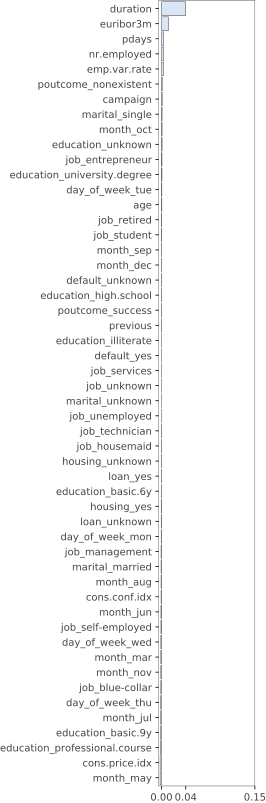

In [423]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train.values.ravel())
importance = rfpimp.importances(rfc, X_test, y_test) # calculate importance! (feed it with the test set!)
rfpimp.plot_importances(importance)

In [424]:
y_test_rfc = rfc.predict(X_test)
y_test_rfc

array([0, 0, 1, ..., 0, 1, 0], dtype=uint8)